In [3]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

from scipy.stats import linregress
from sklearn import datasets

In [4]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [5]:
# File to Load (Remember to Change These)
ratones = pd.read_csv("mouse_drug_data.csv") 
tratamiento = pd.read_csv("clinicaltrial_data.csv") 


In [6]:
# Juntas las dos bases
tabla1 = pd.merge(tratamiento,ratones, on="Mouse ID",how="outer")


In [7]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

base=tabla1.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"].rename("Volumen")

# Convert to DataFrame
droga_dias = pd.DataFrame(base).reset_index()

# Preview DataFrame
droga_dias.head()


,Drug,Timepoint,Volumen
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [8]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
volumen_error = tabla1.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
volumen_error_data = pd.DataFrame(volumen_error).reset_index()
# Preview DataFrame
volumen_error_data .head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [9]:
# Minor Data Munging to Re-Format the Data Frames
Tabla_Droga_timepoint = droga_dias.pivot(index = "Timepoint", columns ="Drug", values ="Volumen" ) 
 
# Preview that Reformatting worked
Tabla_Droga_timepoint

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


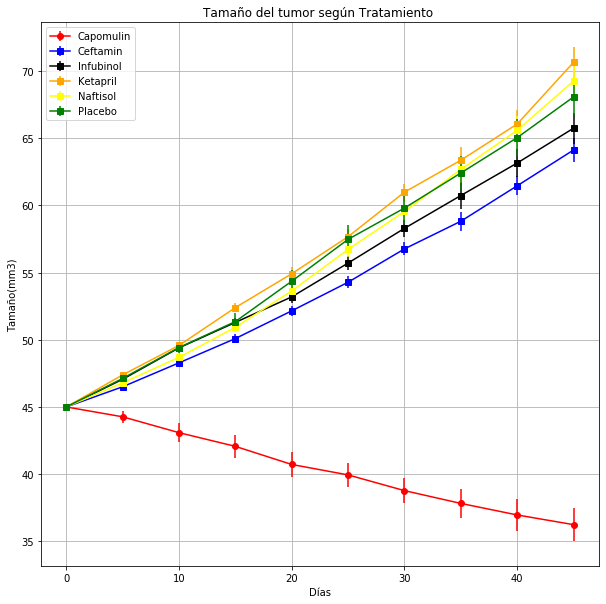

In [10]:
# Generate the Plot (with Error Bars)
droga1 = volumen_error_data.loc[volumen_error_data["Drug"] =="Capomulin", "Tumor Volume (mm3)"]
droga2 = volumen_error_data.loc[volumen_error_data["Drug"] == "Ceftamin", "Tumor Volume (mm3)"]
droga3 = volumen_error_data.loc[volumen_error_data["Drug"] == "Infubinol", "Tumor Volume (mm3)"]
droga4 = volumen_error_data.loc[volumen_error_data["Drug"] == "Ketapril", "Tumor Volume (mm3)"]
droga5 = volumen_error_data.loc[volumen_error_data["Drug"] == "Naftisol", "Tumor Volume (mm3)"]
droga6 = volumen_error_data.loc[volumen_error_data["Drug"] == "Placebo", "Tumor Volume (mm3)"]
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.figure(figsize=(10,10))
plt.errorbar(Time, Tabla_Droga_timepoint["Capomulin"] , yerr= droga1, label= "Capomulin", marker= "o", color="red")
plt.errorbar(Time, Tabla_Droga_timepoint["Ceftamin"] , yerr= droga2, label= "Ceftamin",   marker= "s", color="blue")
plt.errorbar(Time, Tabla_Droga_timepoint["Infubinol"] , yerr= droga3, label= "Infubinol", marker= "s", color="black")
plt.errorbar(Time, Tabla_Droga_timepoint["Ketapril"] , yerr= droga3, label= "Ketapril", marker= "s", color="orange")
plt.errorbar(Time, Tabla_Droga_timepoint["Naftisol"] , yerr= droga3, label= "Naftisol", marker= "s", color="yellow")
plt.errorbar(Time, Tabla_Droga_timepoint["Placebo"] , yerr= droga6 , label= "Placebo",    marker= "s", color="green")
plt.legend()
plt.title("Tamaño del tumor según Tratamiento ")
plt.xlabel("Días")
plt.ylabel("Tamaño(mm3)")
plt.grid()
# Save the Figure
plt.savefig("Tumor1.png")

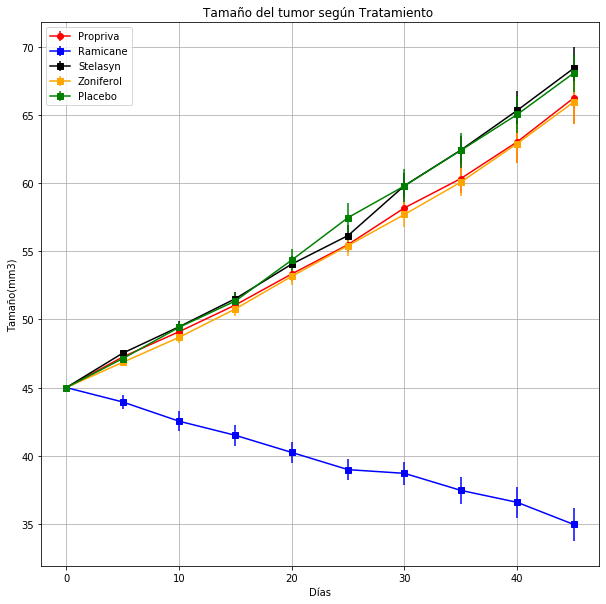

In [11]:
# Generate the Plot (with Error Bars)
droga1 = volumen_error_data.loc[volumen_error_data["Drug"] == "Propriva", "Tumor Volume (mm3)"]
droga2 = volumen_error_data.loc[volumen_error_data["Drug"] == "Ramicane", "Tumor Volume (mm3)"]
droga3 = volumen_error_data.loc[volumen_error_data["Drug"] == "Stelasyn", "Tumor Volume (mm3)"]
droga4 = volumen_error_data.loc[volumen_error_data["Drug"] == "Zoniferol", "Tumor Volume (mm3)"]
droga6 = volumen_error_data.loc[volumen_error_data["Drug"] == "Placebo", "Tumor Volume (mm3)"]
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.figure(figsize=(10,10))
plt.errorbar(Time, Tabla_Droga_timepoint["Propriva"] , yerr= droga1, label= "Propriva", marker= "o", color="red")
plt.errorbar(Time, Tabla_Droga_timepoint["Ramicane"] , yerr= droga2, label= "Ramicane",   marker= "s", color="blue")
plt.errorbar(Time, Tabla_Droga_timepoint["Stelasyn"] , yerr= droga3, label= "Stelasyn", marker= "s", color="black")
plt.errorbar(Time, Tabla_Droga_timepoint["Zoniferol"] , yerr= droga3, label= "Zoniferol", marker= "s", color="orange")
plt.errorbar(Time, Tabla_Droga_timepoint["Placebo"] , yerr= droga6 , label= "Placebo",    marker= "s", color="green")
plt.legend()
plt.title("Tamaño del tumor según Tratamiento ")
plt.xlabel("Días")
plt.ylabel("Tamaño(mm3)")
plt.grid()
# Save the Figure
plt.savefig("Tumor2.png")

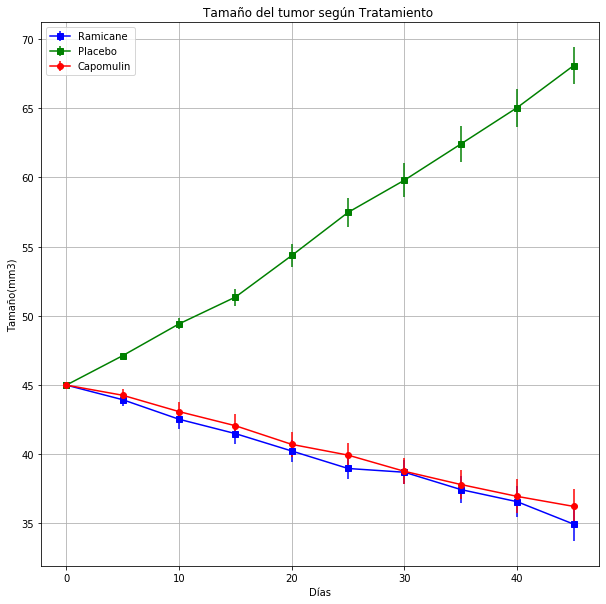

In [12]:
# Garficando las que mejor reultado tienen

droga6 = volumen_error_data.loc[volumen_error_data["Drug"] == "Placebo", "Tumor Volume (mm3)"]
droga1 = volumen_error_data.loc[volumen_error_data["Drug"] =="Capomulin", "Tumor Volume (mm3)"]
droga2 = volumen_error_data.loc[volumen_error_data["Drug"] == "Ramicane", "Tumor Volume (mm3)"]

Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.figure(figsize=(10,10))

plt.errorbar(Time, Tabla_Droga_timepoint["Ramicane"] , yerr= droga2, label= "Ramicane",   marker= "s", color="blue")
plt.errorbar(Time, Tabla_Droga_timepoint["Placebo"] , yerr= droga6 , label= "Placebo",    marker= "s", color="green")
plt.errorbar(Time, Tabla_Droga_timepoint["Capomulin"] , yerr= droga1, label= "Capomulin", marker= "o", color="red")

plt.legend()
plt.title("Tamaño del tumor según Tratamiento ")
plt.xlabel("Días")
plt.ylabel("Tamaño(mm3)")
plt.grid()
# Save the Figure
plt.savefig("Tumor3.png")


In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Meta_base=tabla1.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"].rename("Metastasis")
# Convert to DataFrame
Metastasis_dia = pd.DataFrame(Meta_base).reset_index()
# Preview DataFrame
Metastasis_dia

,Drug,Timepoint,Metastasis
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastasis_error = tabla1.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
metastasis_error_data = pd.DataFrame(metastasis_error).reset_index()
# Preview DataFrame
metastasis_error_data

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [15]:
# Minor Data Munging to Re-Format the Data Frames
Tabla1_Droga_timepoint = Metastasis_dia.pivot(index = "Timepoint", columns ="Drug", values ="Metastasis" ) 
# Preview that Reformatting worked
Tabla1_Droga_timepoint

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


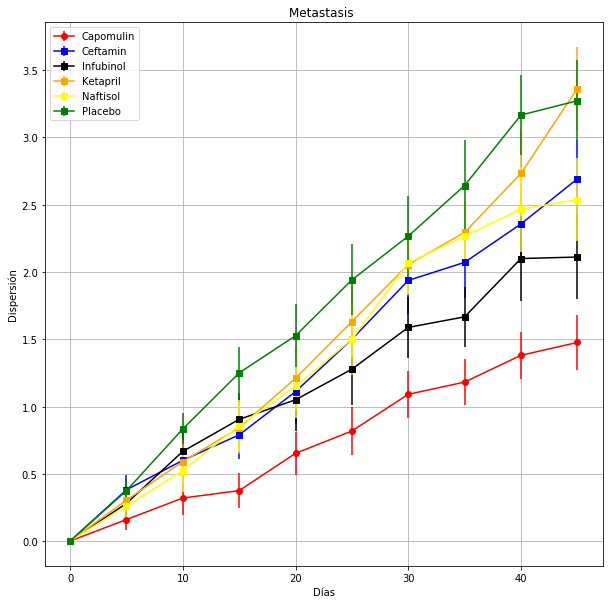

In [16]:
# Generate the Plot (with Error Bars)
droga1 = metastasis_error_data.loc[metastasis_error_data["Drug"] =="Capomulin", "Metastatic Sites"]
droga2 = metastasis_error_data.loc[metastasis_error_data["Drug"] == "Ceftamin", "Metastatic Sites"]
droga3 = metastasis_error_data.loc[metastasis_error_data["Drug"] == "Infubinol", "Metastatic Sites"]
droga4 = metastasis_error_data.loc[metastasis_error_data["Drug"] == "Ketapril", "Metastatic Sites"]
droga5 = metastasis_error_data.loc[metastasis_error_data["Drug"] == "Naftisol", "Metastatic Sites"]
droga6 = metastasis_error_data.loc[metastasis_error_data["Drug"] == "Placebo", "Metastatic Sites"]
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.figure(figsize=(10,10))
plt.errorbar(Time, Tabla1_Droga_timepoint["Capomulin"] , yerr= droga1, label= "Capomulin", marker= "o", color="red")
plt.errorbar(Time, Tabla1_Droga_timepoint["Ceftamin"] , yerr= droga2, label= "Ceftamin",   marker= "s", color="blue")
plt.errorbar(Time, Tabla1_Droga_timepoint["Infubinol"] , yerr= droga3, label= "Infubinol", marker= "s", color="black")
plt.errorbar(Time, Tabla1_Droga_timepoint["Ketapril"] , yerr= droga3, label= "Ketapril", marker= "s", color="orange")
plt.errorbar(Time, Tabla1_Droga_timepoint["Naftisol"] , yerr= droga3, label= "Naftisol", marker= "s", color="yellow")
plt.errorbar(Time, Tabla1_Droga_timepoint["Placebo"] , yerr= droga6 , label= "Placebo",    marker= "s", color="green")
plt.legend()
plt.title("Metastasis ")
plt.xlabel("Días")
plt.ylabel("Dispersión")
plt.grid()
# Save the Figure
plt.savefig("Meta1.png")

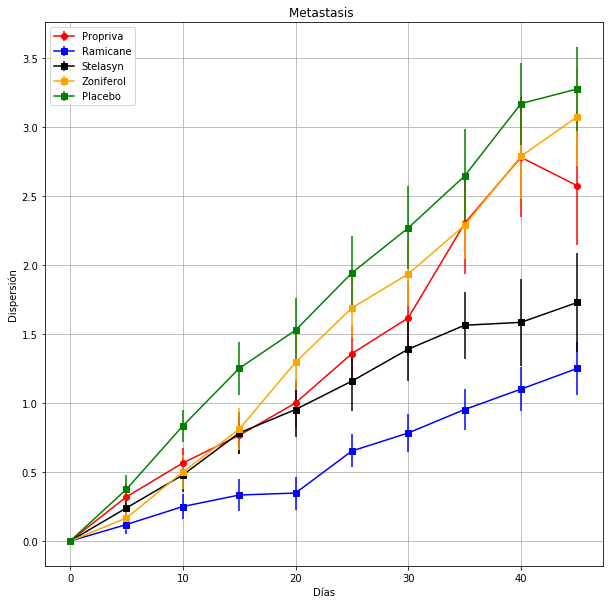

In [17]:
# Generate the Plot (with Error Bars)
droga1 = metastasis_error_data.loc[metastasis_error_data["Drug"] =="Propriva", "Metastatic Sites"]
droga2 = metastasis_error_data.loc[metastasis_error_data["Drug"] == "Ramicane", "Metastatic Sites"]
droga3 = metastasis_error_data.loc[metastasis_error_data["Drug"] == "Stelasyn", "Metastatic Sites"]
droga4 = metastasis_error_data.loc[metastasis_error_data["Drug"] == "Zoniferol", "Metastatic Sites"]

droga6 = metastasis_error_data.loc[metastasis_error_data["Drug"] == "Placebo", "Metastatic Sites"]
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.figure(figsize=(10,10))
plt.errorbar(Time, Tabla1_Droga_timepoint["Propriva"] , yerr= droga1, label= "Propriva", marker= "o", color="red")
plt.errorbar(Time, Tabla1_Droga_timepoint["Ramicane"] , yerr= droga2, label= "Ramicane",   marker= "s", color="blue")
plt.errorbar(Time, Tabla1_Droga_timepoint["Stelasyn"] , yerr= droga3, label= "Stelasyn", marker= "s", color="black")
plt.errorbar(Time, Tabla1_Droga_timepoint["Zoniferol"] , yerr= droga3, label= "Zoniferol", marker= "s", color="orange")

plt.errorbar(Time, Tabla1_Droga_timepoint["Placebo"] , yerr= droga6 , label= "Placebo",    marker= "s", color="green")
plt.legend()
plt.title("Metastasis ")
plt.xlabel("Días")
plt.ylabel("Dispersión")
plt.grid()
# Save the Figure
plt.savefig("Meta2.png")

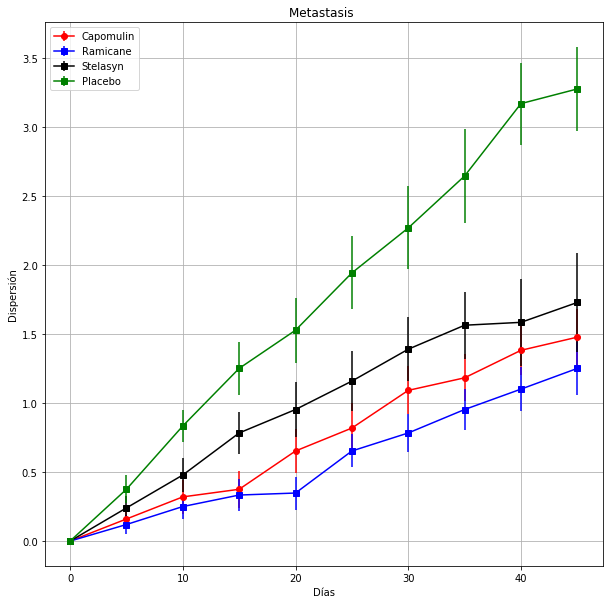

In [18]:
# Generate the Plot (with Error Bars)
droga1 = metastasis_error_data.loc[metastasis_error_data["Drug"] =="Capomulin", "Metastatic Sites"]
droga2 = metastasis_error_data.loc[metastasis_error_data["Drug"] == "Ramicane", "Metastatic Sites"]
droga3 = metastasis_error_data.loc[metastasis_error_data["Drug"] == "Stelasyn", "Metastatic Sites"]
droga6 = metastasis_error_data.loc[metastasis_error_data["Drug"] == "Placebo", "Metastatic Sites"]

Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

plt.figure(figsize=(10,10))
plt.errorbar(Time, Tabla1_Droga_timepoint["Capomulin"] , yerr= droga1, label= "Capomulin", marker= "o", color="red")
plt.errorbar(Time, Tabla1_Droga_timepoint["Ramicane"] , yerr= droga2, label= "Ramicane",   marker= "s", color="blue")
plt.errorbar(Time, Tabla1_Droga_timepoint["Stelasyn"] , yerr= droga3, label= "Stelasyn", marker= "s", color="black")
plt.errorbar(Time, Tabla1_Droga_timepoint["Placebo"] , yerr= droga6 , label= "Placebo",    marker= "s", color="green")
plt.legend()
plt.title("Metastasis ")
plt.xlabel("Días")
plt.ylabel("Dispersión")
plt.grid()
# Save the Figure
plt.savefig("Meta3.png")

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
ratones = tabla1.groupby(["Drug", "Timepoint"])
conteo = ratones["Mouse ID"].count()
# Convert to DataFrame
ratones1 = pd.DataFrame(conteo).reset_index()
# Preview DataFrame
ratones1.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [20]:
tabla4=ratones1.pivot(index="Timepoint",columns="Drug",values="Mouse ID")
tabla4

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


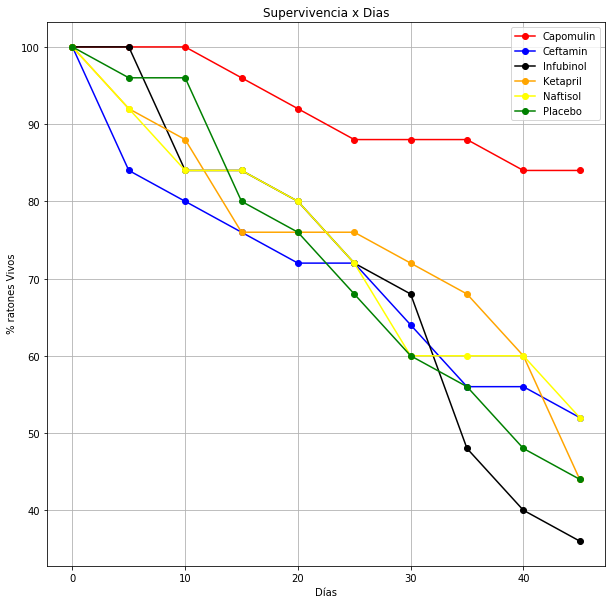

In [21]:
# Generate the Plot (Accounting for percentages)

Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

plt.figure(figsize=(10,10))
plt.plot(Time, (tabla4["Capomulin"]/25)*100 , label= "Capomulin", marker= "o", color="red")
plt.plot(Time, (tabla4["Ceftamin"]/25)*100 , label= "Ceftamin", marker= "o", color="blue")
plt.plot(Time, (tabla4["Infubinol"]/25)*100 , label= "Infubinol", marker= "o", color="black")
plt.plot(Time, (tabla4["Ketapril"]/25)*100 , label= "Ketapril", marker= "o", color="orange")
plt.plot(Time, (tabla4["Naftisol"]/25)*100 , label= "Naftisol", marker= "o", color="Yellow")
plt.plot(Time, (tabla4["Placebo"]/25)*100 , label= "Placebo", marker= "o", color="green")

plt.legend()
plt.title("Supervivencia x Dias")
plt.xlabel("Días")
plt.ylabel(" % ratones Vivos")
plt.grid()
# Save the Figure
plt.savefig("sup1.png")



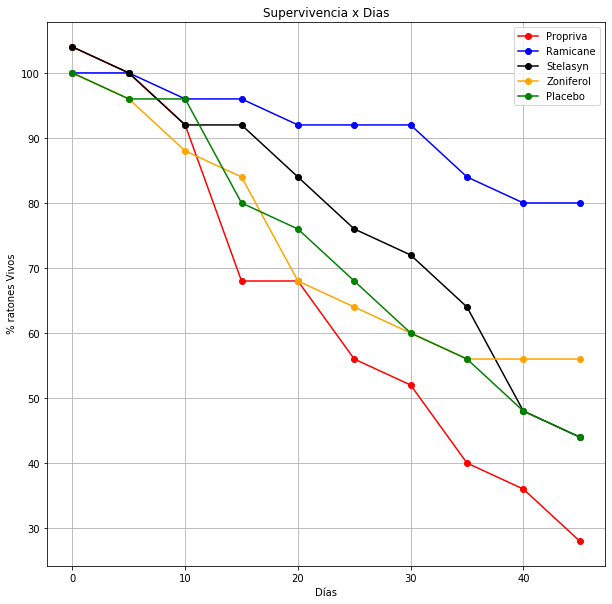

In [22]:
#Gráfica del resto de droga y sobrevivientes


Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

plt.figure(figsize=(10,10))
plt.plot(Time, (tabla4["Propriva"]/25)*100 , label= "Propriva", marker= "o", color="red")
plt.plot(Time, (tabla4["Ramicane"]/25)*100 , label= "Ramicane", marker= "o", color="blue")
plt.plot(Time, (tabla4["Stelasyn"]/25)*100 , label= "Stelasyn", marker= "o", color="black")
plt.plot(Time, (tabla4["Zoniferol"]/25)*100 , label= "Zoniferol", marker= "o", color="orange")

plt.plot(Time, (tabla4["Placebo"]/25)*100 , label= "Placebo", marker= "o", color="green")

plt.legend()
plt.title("Supervivencia x Dias")
plt.xlabel("Días")
plt.ylabel(" % ratones Vivos")
plt.grid()
# Save the Figure
plt.savefig("sup2.png")

In [23]:
# Calculate the percent changes for each drug

porcentaje_volumen=( ((Tabla_Droga_timepoint.loc[45,:]-45)/45)*100)
porcentaje_sobrevivencia=(((tabla4.loc[45,:]-tabla4.loc[0,:])/tabla4.loc[0,:])*100)
Metastasis=Tabla1_Droga_timepoint.loc[45,:]
# Display the data to confirm

porcentaje_volumen

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

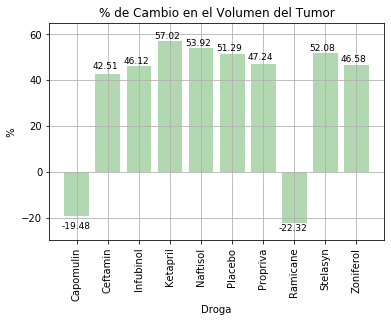

In [78]:
droga = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
x_axis = np.arange(len(porcentaje_volumen))

plt.bar(x_axis,porcentaje_volumen , color='green', alpha=.3, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, droga,rotation=90)   
plt.title("% de Cambio en el Volumen del Tumor")
plt.xlabel("Droga")
plt.ylabel(" % ")
plt.ylim(-30, 65)
plt.text(-0.5,-25,"-19.48",fontsize=9)
plt.text(.5,45,"42.51",fontsize=9)
plt.text(1.5,47,"46.12",fontsize=9)
plt.text(2.5,58,"57.02",fontsize=9)
plt.text(3.5,55,"53.92",fontsize=9)
plt.text(4.5,53,"51.29",fontsize=9)
plt.text(5.5,49,"47.24",fontsize=9)
plt.text(6.5,-26,"-22.32",fontsize=9)
plt.text(7.5,53,"52.08",fontsize=9)
plt.text(8.5,48,"46.58",fontsize=9)
plt.grid()



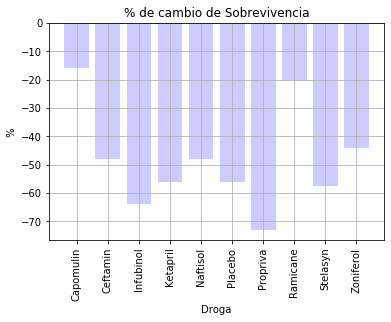

In [25]:
droga = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
x_axis = np.arange(len(porcentaje_sobrevivencia))
plt.bar(x_axis,porcentaje_sobrevivencia , color='blue', alpha=.2, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, droga,rotation=90)   
plt.title("% de cambio de Sobrevivencia")
plt.xlabel("Droga")
plt.ylabel(" % ")
plt.grid()

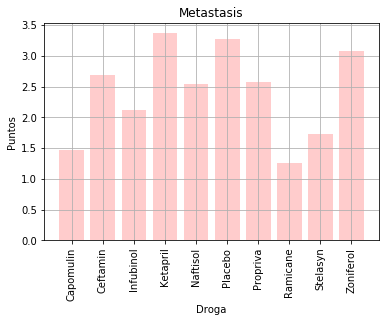

In [26]:
droga = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
x_axis = np.arange(len(porcentaje_sobrevivencia))
plt.bar(x_axis,Metastasis , color='red', alpha=.2, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, droga,rotation=90)   
plt.title("Metastasis")
plt.xlabel("Droga")
plt.ylabel("Puntos")
plt.grid()